# Homework 3

## By Team VAC

### Intro into bipartite networks

For this week's task, we looked in the Davis club network. The network consist of 18 nodes, which represents Davis club memeber. Each edge is their attendance to a shared meeting. For the analysis, we use's [Networkx's](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html) Davis club code below to start out the example. From the documentation code, it appears Theresa has the most friendships within the club based on the degree score and her share friendship score. She is very interconnected in the club meetings, so she should appear in the majority of club meetings. We will see if this assumption is true later on.

The grah provided does make the network appear as a unipartite network rather than a bipartite. Let's change the graph format to show the network as 2 mode with the bipartite layout function.

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

C:\Users\walki\AppData\Local\Temp\ipykernel_23352\2902208672.py:11: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


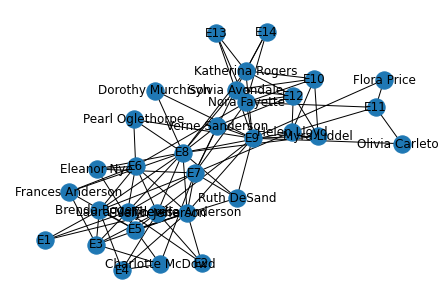

In [5]:
#Code is dervide from Networkx's Davis Club Documentation 
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()


### Displaying as a bipartite network

[('E8', 0.7777777777777777), ('E9', 0.6666666666666666)]


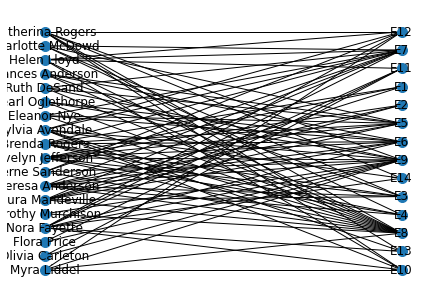

In [47]:
# using the bipartite layout for clarity
pos=nx.bipartite_layout(G,women)
nx.draw(G, pos,with_labels=True,node_size=100)

#Lets calculate the bipartite centrality of the clubs network!
club_cent=sorted(nx.bipartite.degree_centrality(G,clubs).items() , key=lambda x: x[1], reverse=True)
print(club_cent[0:2])

### clubs and its members

It appears that clubs E8 and E9 has the highest degree centrality, which means these two clubs are most popular amongst Davis member's. We can expand on these two graphs with a subgraph function. Let's filter for E8 and E9's network with the ego graph funtion. This function will return a subgraph of nodes whose directly connected to these specific clubs

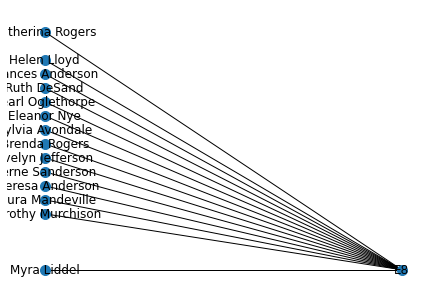

In [41]:
#Create a list with only E8 and E9 clubs
E8_G=nx.ego_graph(G, 'E8', radius=1)
pos=nx.bipartite_layout(E8_G,women)
nx.draw(E8_G, pos,with_labels=True,node_size=100)


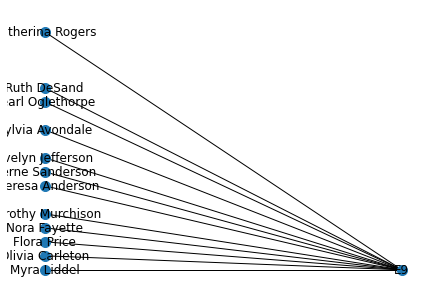

In [42]:
#E9 Graph representation
E9_G=nx.ego_graph(G, 'E9', radius=1)
pos=nx.bipartite_layout(E9_G,women)
nx.draw(E9_G, pos,with_labels=True,node_size=100)


[('Nora Fayette', 0.10858130346049079), ('Evelyn Jefferson', 0.09243053952845212), ('Theresa Anderson', 0.08382717212549207)]


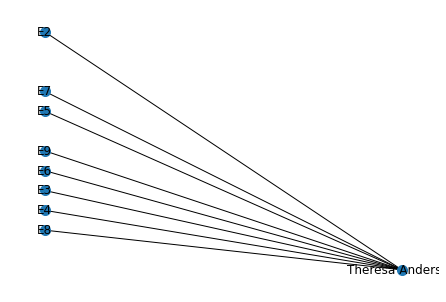

In [56]:
#Take a peak at theresa's club memebership
E9_G=nx.ego_graph(G, 'Theresa Anderson', radius=1)
pos=nx.bipartite_layout(E9_G,clubs)
nx.draw(E9_G, pos,with_labels=True,node_size=100)

#seeing if Theresa also had the highest between closeness score
women_close =sorted(nx.betweenness_centrality(G).items() , key=lambda x: x[1], reverse=True)

#Range starts at the first highest women node
print(women_close[3:6])

### Member Analysis

It is not a suprise that Theresa appears in both high member meetings. It appears all the popular members like Evelyn or Theresa are at half of the  club meetings, which ensures their high co-occurance counts. It does not mean memeberships with the high degree clubs guarantee a high degree score, as Olivia Cartlon is a part of E9 but has a score of 12. Now, lets see if a member with a high degree also has the best shortest path.

We use the betweeness centrality score to measure the member's connectios in the graph. The results reveal that Nora is the most influental person in the club due to her centrality score. Nora does have a degree of 17 but she does not share the highest co occurance. This can be interpreted that Nora has the most unqiue friendships compared to other members. 

